# **1. Introdução do Projeto**

O dataset escolhido traz dados reais sobre o comportamento de estudantes e suas notas e médias na universidade. Sabemos que muitos fatores podem influenciar no aprendizado de uma pessoa e consequentemente no seu desempenho. A idéia aqui é tentar encontrar alguma resposta que esclareça essa questão.


Para acessar o dataset real clique [aqui](https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset/data).


Nota do criador do dataset:



> The dataset is real, but I included some bias to create a greater challenge for my students.



> PT-BR: O conjunto de dados é real, mas eu incluí alguns vieses para criar um desafio maior para os meus alunos.




O desafio vai ser lidar com os dados que possuem algum tipo de viés. Como um dos meus primeiros projetos vou topar o desafio. Vamos começar!




*   **Vou explicar cada coluna dataset:**






* **Student_ID:** Identificador único para cada aluno.
* **First_Name:** Primeiro nome do aluno.
* **Last_Name:** Sobrenome do aluno.
* **Email:** Email
* **Gender:** Gênero
* **Age:** Idade do aluno.
* **Department:** Departamento do aluno (ex: Computação, Engenharia, Administração).
* **Attendance (%):** Percentual de presença (0-100%).
* **Midterm_Score:** Nota da prova intermediária (de 0 a 100).
* **Final_Score:** Nota da prova final (de 0 a 100).
* **Assignments_Avg:** Média das notas de trabalhos (de 0 a 100).
* **Quizzes_Avg:** Média das notas dos quizzes (de 0 a 100).
* **Participation_Score:** Nota de participação em aula (de 0 a 10).
* **Projects_Score:** Nota dos projetos (de 0 a 100).
* **Total_Score:** Soma ponderada de todas as notas.
* **Grade:** Nota final em letras (A, B, C, D, F).
* **Study_Hours_per_Week:** Horas médias de estudo por semana.
* **Extracurricular_Activities:** Participa de atividades extracurriculares? (Sim/Não).
* **Internet_Access_at_Home:** Possui acesso à internet em casa? (Sim/Não).
* **Parent_Education_Level:** Nível de escolaridade mais alto dos pais (Nenhum, Ensino Médio, Graduação, Mestrado, Doutorado).
* **Family_Income_Level:** Nível de renda familiar (Baixa, Média, Alta).
* **Stress_Level (1-10):** Nível de estresse auto-relatado (1: Baixo, 10: Alto).
* **Sleep_Hours_per_Night:** Horas médias de sono por noite.



De acordo com a página inicial o "Total_Score" é resultado da soma ponderada das colunas abaixos com os seguintes pesos:

* Component	| Weight (%)
* Midterm	| 15%
* Final	| 25%
* Assignments Avg	| 15%
* Quizzes Avg	| 10%
* Participation	| 5%
* Projects Score	| 30%
* Total	| 100%

* **Vamos começar importando as bibliotecas que irei utilizar**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

* **Vamos importar os arquivos do dataset**

In [ ]:
!git clone https://github.com/gabrielwsb/3-projeto-eda-estudantes

Cloning into '3-projeto-eda-estudantes'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 1.43 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (8/8), done.


# **2. Primeiras impressões do Dataset**

In [ ]:
dataset_1 = pd.read_csv('/content/3-projeto-eda-estudantes/Students_Grading_Dataset.csv')

In [ ]:
# Código para mostrar todas as colunas. Sem ele, 3 colunas estavam sendo ocultadas.
pd.set_option('display.max_columns', None)

dataset_1

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,A,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,C,24.2,No,Yes,NaN,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,D,7.6,No,Yes,NaN,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,A,14.5,Yes,No,PhD,Medium,10,5.9


Primeiro insight que consigo tirar é que existe alguns fatores que afetam a grade final do aluno (nota em letras) que não estão vísiveis a um primeiro olhar. Pegue por exemplos os estudantes de indice 1 e 3.
* Indice 1 participou de **mais aulas**, possui **notas maiores** mas tirou a **grade F**.
* Indice 3 participou de **menos aulas**,  possui **notas menores** mas tirou a **grade A**.

Isto provavelmente tem a ver com o viés que o autor comentou na página do dataset. Vamos procurar respostas.

Para começarmos eu vou remover as seguintes colunas:
* Student_ID
* Email
* First_Name
* Last_Name



In [ ]:
# Removendo as colunas que não irei utilizar
dataset = dataset_1.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

dataset

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,A,7.8,No,No,Master's,Medium,10,4.5
4996,Male,19,Mathematics,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,C,24.2,No,Yes,NaN,Medium,4,7.2
4997,Female,24,CS,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,D,7.6,No,Yes,NaN,High,5,6.6
4998,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,A,14.5,Yes,No,PhD,Medium,10,5.9


Agora vamos ver um panorama geral do dataset




In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

Nota-se que todo o dataset possui apenas uma coluna com dados faltantes que seria o **Parent_Education_Level**.

In [ ]:
dataset['Parent_Education_Level'].unique()

array(["Master's", 'High School', nan, "Bachelor's", 'PhD'], dtype=object)

Para esta análise irei substituir o termo "NaN" por "Unknown"

In [ ]:
dataset['Parent_Education_Level'] = dataset['Parent_Education_Level'].fillna('Unknown')
dataset['Parent_Education_Level'].unique()

array(["Master's", 'High School', 'Unknown', "Bachelor's", 'PhD'],
      dtype=object)

Dessa forma, o dataset não possui valores nulos. Agora vamos olhar as principais colunas.

# **3. Analisando as principais colunas**

## 3.1 Gênero

In [ ]:
dataset['Gender'].value_counts()

,count
Gender,
Male,2551
Female,2449


Vou gerar um gráfico de pizza para visualizarmos melhor a proporção:

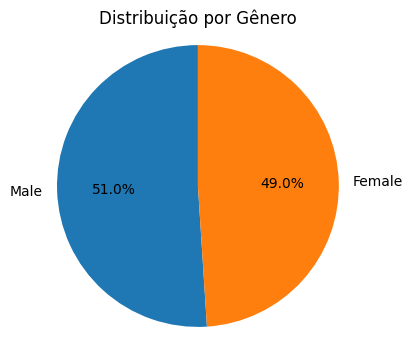

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(dataset['Gender'].value_counts(), labels=dataset['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Gênero')
plt.axis('equal')
plt.show()



> **Neste dataset, a maioria dos estudantes são homens, com apenas 2% a mais do que as mulheres. Vamos continuar a análise**



## 3.2 Idade

In [ ]:
# Dados da coluna 'Age'
dataset['Age'].describe().T

,Age
count,5000.000000
mean,21.048400
std,1.989786
min,18.000000
25%,19.000000
50%,21.000000
75%,23.000000
max,24.000000


A idade dos 5 mil alunos varia entre 18 a 24 anos, com média de 21. Nessa faixa podemos afirmar que é um público bem jovem.

Vamos ver através de um gráfico de dispersão como se apresenta as idades dos alunos.

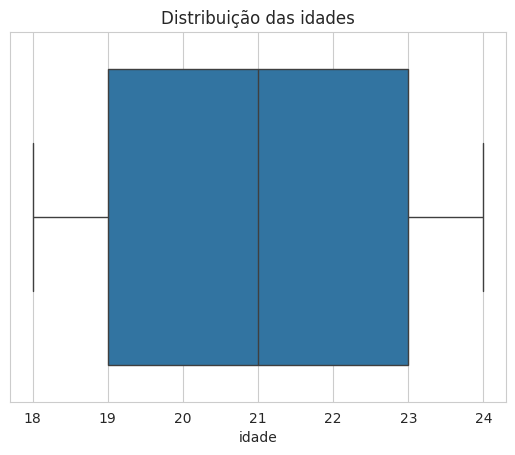

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=dataset['Age'])
  grafico.set(title='Distribuição das idades', xlabel='idade');

Olhando o gráfico podemos afirmar que as idades estão distribuídas de forma equilibrada, não apresentando *outliers* (pontos fora da curva).

Vamos ver a média de idade dos homens e das mulheres:

In [ ]:
media_idade_homens = dataset[dataset['Gender'] == 'Male']['Age'].mean()
print(f'Média da idade dos homens: {media_idade_homens}')

media_idade_mulheres = dataset[dataset['Gender'] == 'Female']['Age'].mean()
print(f'Média da idade das mulheres: {media_idade_mulheres}')

Média da idade dos homens: 21.02156017248138
Média da idade das mulheres: 21.07635769701919




> **Podemos concluir que as idades dos alunos estão bem equiparadas, tanto ao considerar o total quanto ao considerar a divisão por gênero.**





## 3.3 Departamento do aluno

In [ ]:
dataset['Department'].value_counts()

,count
Department,
Engineering,1274
Business,1264
CS,1239
Mathematics,1223


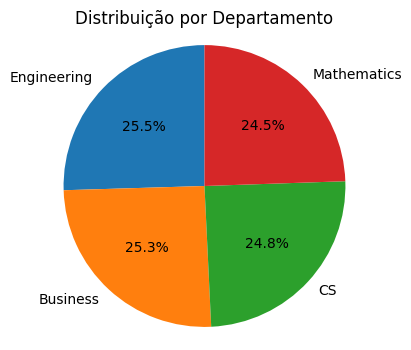

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(dataset['Department'].value_counts(), labels=dataset['Department'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Departamento')
plt.axis('equal')
plt.show()

A distribuição por departamento é praticamente igual entre os 4 tipos. Se pegarmos o maior menos o menor a diferença é menos que 1%. Vamos olhar a divisão de departamento por gênero:

In [ ]:
# Preparando para os gráficos

engineering_gender = dataset[dataset['Department'] == 'Engineering']['Gender'].value_counts()

business_gender = dataset[dataset['Department'] == 'Business']['Gender'].value_counts()

mathematics_gender = dataset[dataset['Department'] == 'Mathematics']['Gender'].value_counts()

cs_gender = dataset[dataset['Department'] == 'CS']['Gender'].value_counts()

* Criando os gráficos

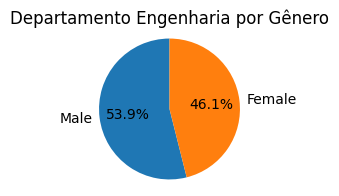

In [ ]:
plt.figure(figsize=(2,2))
plt.pie(engineering_gender, labels=engineering_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Departamento Engenharia por Gênero')
plt.axis('equal')
plt.show()

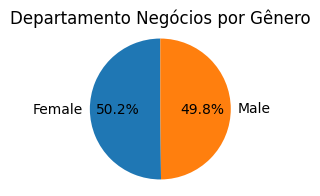

In [ ]:
plt.figure(figsize=(2,2))
plt.pie(business_gender, labels=business_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Departamento Negócios por Gênero')
plt.axis('equal')
plt.show()

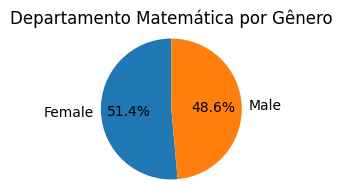

In [ ]:
plt.figure(figsize=(2,2))
plt.pie(mathematics_gender, labels=mathematics_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Departamento Matemática por Gênero')
plt.axis('equal')
plt.show()

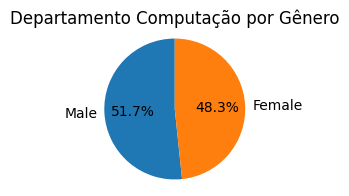

In [ ]:
plt.figure(figsize=(2,2))
plt.pie(cs_gender, labels=cs_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Departamento Computação por Gênero')
plt.axis('equal')
plt.show()



> **A diferença maior ficou para o departamento de Engenharia com 7,8% a mais de homens do que mulheres. Mesmo assim a distribuição está bem equilibrada.**



## 3.4 Percentual de presença

In [ ]:
dataset['Attendance (%)'].describe().T

,Attendance (%)
count,5000.000000
mean,75.356076
std,14.392716
min,50.010000
25%,62.945000
50%,75.670000
75%,87.862500
max,100.000000


Média de 75% de presença nas aulas. Em geral podemos afirmar que os alunos foram bastante presentes no período de avaliação. O aluno com mais faltas esteve ausente em metade das aulas.

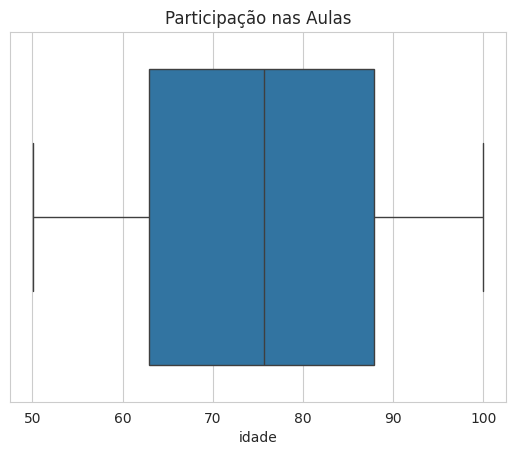

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=dataset['Attendance (%)'])
  grafico.set(title='Participação nas Aulas', xlabel='idade');

## 3.5 Nota de participação

In [ ]:
# Panorama geral da coluna
dataset['Participation_Score'].describe().T

,Participation_Score
count,5000.000000
mean,4.996372
std,2.898978
min,0.000000
25%,2.507500
50%,4.960000
75%,7.550000
max,10.000000


Com uma média de 5, podemos afirmar que os alunos participaram pouco das atividades. Considerando uma média boa a partir de 7, vamos ver quantos alunos estão dentro dessa média:

In [ ]:
participacao_7 = dataset[dataset['Participation_Score'] >= 7]
participacao_7['Participation_Score'].describe().T

,Participation_Score
count,1497.000000
mean,8.533487
std,0.859067
min,7.000000
25%,7.790000
50%,8.550000
75%,9.280000
max,10.000000


De 5000 alunos, 30% tiveram uma nota de partipação maior ou igual a 7. Isto indica que boa parte dos alunos não participou devidamente das atividades.

In [ ]:
participacao_7['Grade'].value_counts()

,count
Grade,
B,313
A,303
F,301
D,299
C,281


Está seria a distribuição das notas por grade dos alunos que tiveram boa participação. Os alunos que reprovaram ficaram na casa dos 20%, enquanto o restante conseguiu ser aprovado.

O gráfico acima confirma que os números estão bem concentrados de 60-90% e que há pouca dispersão no geral.

## 3.6 Soma ponderada de todas as notas

In [ ]:
# Panorama inicial
dataset['Total_Score'].describe().T

,Total_Score
count,5000.000000
mean,75.021860
std,14.323246
min,50.010000
25%,62.710000
50%,75.345000
75%,87.060000
max,99.990000


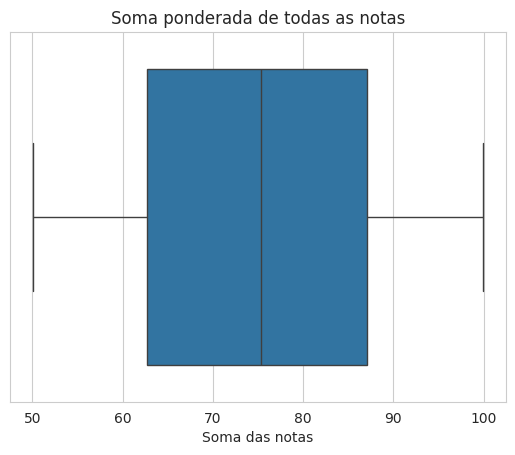

In [ ]:
# Gerando um gráfico boxplot
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=dataset['Total_Score'])
  grafico.set(title='Soma ponderada de todas as notas', xlabel='Soma das notas');

Veja como que o gráfico confirma os dados extraídos da linha de código acima. Com a média de 75 e desvio padrão de 14, a maior parte dos dados estão concetrados entre 61-89.

Agora eu quero ver quantos alunos teriam passados considerando a média de 60

In [ ]:
print(f"Aprovados com média 60: {len(dataset[dataset['Total_Score'] >= 60])}")

Aprovados com média 60: 4017


Se a média fosse 60, 80% dos alunos teriam sido aprovados.

Vou fazer o código para mostrar a porcentagem de alunos que teriam passado com a média 60 por departamento:

In [ ]:
total_por_departamento = dataset.groupby('Department').size()

aprovados = dataset[dataset['Total_Score'] >= 60].groupby('Department').size()

resultado = ({
    'Total_alunos' : total_por_departamento,
    'Aprovados' : aprovados
})

In [ ]:
resultado['Aprovados média 60'] = (resultado['Aprovados'] / resultado['Total_alunos'] * 100).round(2)
resultado['Aprovados média 60']

,0
Department,
Business,77.69
CS,79.66
Engineering,81.00
Mathematics,83.07


Com a média 60, temos:
* **Business:** 77,69% dos alunos teriam passado
* **CS:** 79,66% dos alunos teriam passado
* **Engineering:** 81% dos alunos teriam passado
* **Mathematics:** 83,07% dos alunos teriam passado

## 3.7 Nota por Grade

In [ ]:
# Fazendo a contagem por nota
dataset['Grade'].value_counts()

,count
Grade,
B,1014
D,1011
F,1003
A,997
C,975


In [ ]:
# Transformando a contagem das notas em um DataFrame
grade_counts = dataset['Grade'].value_counts().sort_index()

grade_df = grade_counts.reset_index()
grade_df.columns = ['Grade', 'Count']

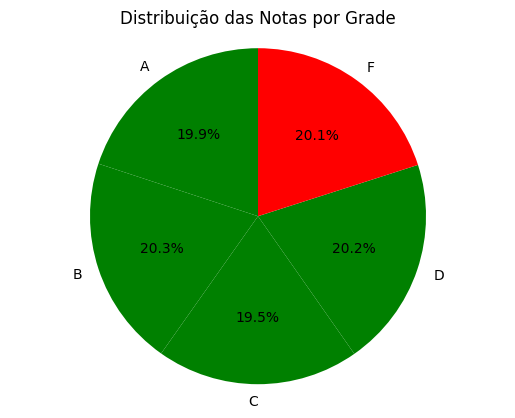

In [ ]:
# Definindo as cores
cores = ['green' if grade != 'F' else 'red' for grade in grade_df['Grade']]

# Criando o gráfico
plt.pie(grade_df['Count'], labels=grade_df['Grade'], colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Notas por Grade')
plt.axis('equal')
plt.show()

Aqui conseguimos observar que 20% dos alunos reprovaram (F) e que também as notas estão com uma distruibuição equilibrada entre elas.

Agora vamos ver por departamento:

In [ ]:
# Filtra os alunos com as notas de A a D
aprovados_grade = dataset[dataset['Grade'].isin(['A', 'B', 'C', 'D'])].groupby('Department').size()

# Juntando os resultados em um DataFrame
resultado_grade = ({
    'Total_Alunos' : total_por_departamento,
    'Aprovados_Grade' : aprovados_grade
})

# Calculando a porcentagem
resultado['Aprovados Grade A-D'] = (resultado_grade['Aprovados_Grade'] / resultado_grade['Total_Alunos'] * 100).round(2)
resultado['Aprovados Grade A-D']


,0
Department,
Business,80.78
CS,78.61
Engineering,80.69
Mathematics,79.64


O departamento de Computação (CS) sai ligeiramente a frente com o maior números de reprovados e o departamento de Negócios (Business) como o que mais aprovou alunos.

Perceba também como a quantidade total de reprovados ficou na casa dos 20%.

## 3.8 Horas estudadas por semana

In [ ]:
# Panorama geral da coluna
dataset['Study_Hours_per_Week'].describe().T

,Study_Hours_per_Week
count,5000.000000
mean,17.521140
std,7.193035
min,5.000000
25%,11.500000
50%,17.400000
75%,23.700000
max,30.000000


Quando se fala em semana consideramos o valor 7. Portanto cada valor apresentado acima se dividido por 7 teremos a quantidade de horas estudadas por dia. E também estou considerando que esse "estudo por semana" seria algo fora do período das aulas, ou seja em casa.

Média de 17h estudadas por semana (2h por dia) mostra que os alunos desta universidade possui outras ocupações como trabalho, ou mesmo estudo em período integral na universidade.

Vamos ver qual foi o tempo de estudo dos alunos que tiraram F:

In [ ]:
# Filtro os alunos que tiraram F
alunos_f = dataset[dataset['Grade'] == 'F']

alunos_f['Study_Hours_per_Week']

,Study_Hours_per_Week
1,27.1
2,12.4
7,16.7
22,27.7
27,15.3
...,...
4962,8.1
4963,10.4
4968,21.3
4983,21.7


In [ ]:
alunos_f['Study_Hours_per_Week'].describe().T

,Study_Hours_per_Week
count,1003.000000
mean,17.145763
std,7.152232
min,5.000000
25%,11.150000
50%,16.700000
75%,23.300000
max,29.900000


A média de horas estudadas dos alunos que reprovaram é praticamente igual a média de todos os alunos. Considerando que 80% dos alunos estão aprovados e 20% não, podemos afirmar que esse tempo de estudo contribuiu para a aprovação.

## 3.9 Acesso a Internet em casa

In [ ]:
# Contando os dados
dataset['Internet_Access_at_Home'].value_counts()

,count
Internet_Access_at_Home,
Yes,2520
No,2480


Os dados estão bem divididos entre os que e os que não tem acesso a internet em casa.

Agora vamos ver pela nota da grade:

In [ ]:
# Filtrando por sim - quantidade
com_internet = dataset[dataset['Internet_Access_at_Home'] == 'Yes']

com_internet_grade = com_internet.groupby('Grade').size()

# Em porcentagem
com_internet_percentual = (com_internet['Grade'].value_counts(normalize=True).sort_index() * 100).round(2)

print(com_internet_grade)
print(com_internet_percentual)

Grade
A    504
B    495
C    514
D    486
F    521
dtype: int64
Grade
A    20.00
B    19.64
C    20.40
D    19.29
F    20.67
Name: proportion, dtype: float64


In [ ]:
# Filtrando por não - quantidade
sem_internet = dataset[dataset['Internet_Access_at_Home'] == 'No']

sem_internet_grade = sem_internet.groupby('Grade').size()

# Em percentual
sem_internet_percentual = (sem_internet['Grade'].value_counts(normalize=True).sort_index() * 100).round(2)

print(sem_internet_grade)
print(sem_internet_percentual)

Grade
A    493
B    519
C    461
D    525
F    482
dtype: int64
Grade
A    19.88
B    20.93
C    18.59
D    21.17
F    19.44
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribuição de Notas por Acesso a Internet'}, xlabel='Grade'>

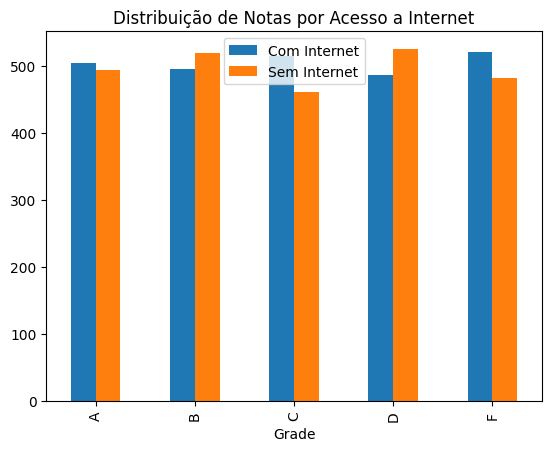

In [ ]:
# Criando um gráfico
grafico = pd.DataFrame({
    'Com Internet': com_internet.groupby('Grade').size(),
    'Sem Internet': sem_internet.groupby('Grade').size()
}).fillna(0)

grafico.plot(kind='bar', title='Distribuição de Notas por Acesso a Internet')


Concluo que o fato do aluno ter internet em casa ou não, não está correlacionado a tirar notas específicas, visto que cada letra ficou com praticamente 50% de cada lado, com uma superioridade mínima menor que 2%.

## 3.10 Escolaridade dos pais

In [ ]:
# Contando
dataset['Parent_Education_Level'].value_counts()

,count
Parent_Education_Level,
Unknown,1025
Bachelor's,1020
PhD,1012
Master's,1000
High School,943


In [ ]:
# Porcentagem das notas por nível de escolaridade dos pais
proporcao = (dataset.groupby('Grade')['Parent_Education_Level'].value_counts(normalize=True).mul(100).round(2).unstack())

print(proporcao)

Parent_Education_Level  Bachelor's  High School  Master's    PhD  Unknown
Grade                                                                    
A                            19.66        19.26     19.26  21.46    20.36
B                            21.60        19.23     19.33  19.23    20.61
C                            20.31        16.92     19.90  20.41    22.46
D                            20.08        19.39     21.07  20.97    18.50
F                            20.34        19.44     20.44  19.14    20.64


Também é possível afirmar que o nível de escolaridade dos pais não inflinge em uma nota de grade específica, mas que interfete no aluno ser aprovado, visto que apenas 20% foram reprovados em todos os níveis.

## 3.11 Renda Familiar

In [ ]:
# Contando
dataset['Family_Income_Level'].value_counts()

,count
Family_Income_Level,
Low,1687
Medium,1674
High,1639


In [ ]:
# Preparando um DataFrame para um gráfico
renda_por_grade = (dataset.groupby('Grade')['Family_Income_Level'].value_counts(normalize=True).mul(100).round(2).unstack())
renda_por_grade

Family_Income_Level,High,Low,Medium
Grade,,,
A,30.59,34.20,35.21
B,33.73,32.94,33.33
C,32.31,34.46,33.23
D,32.84,33.43,33.73
F,34.40,33.70,31.90


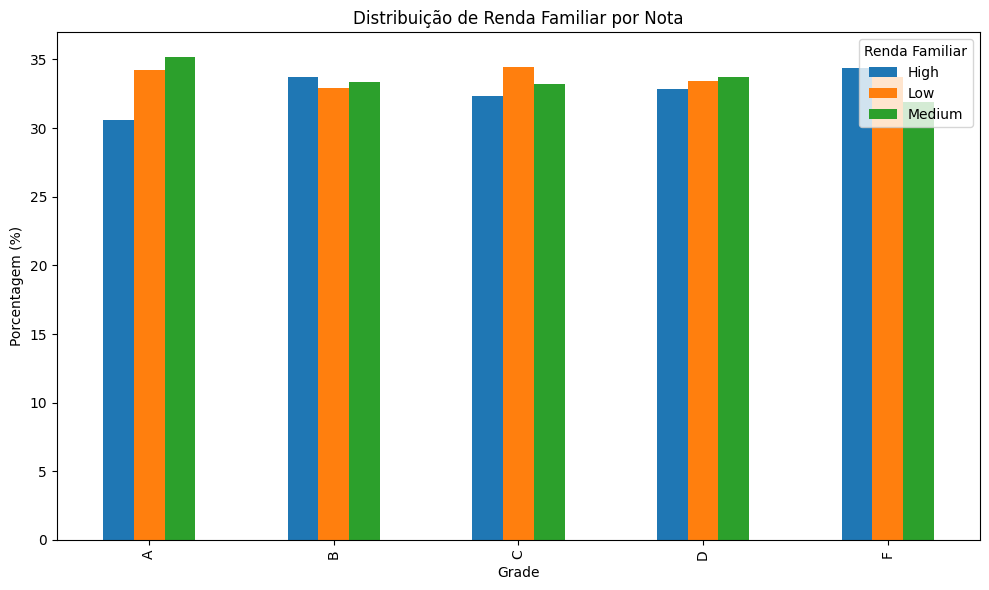

In [ ]:
# Criando o gráfico
renda_por_grade.plot(kind='bar', figsize=(10,6))
plt.title('Distribuição de Renda Familiar por Nota')
plt.xlabel('Grade')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Renda Familiar')
plt.tight_layout()
plt.show()

Perceba que o aluno vir de familia de alta renda (High) não garante tirar melhores médias do que os alunos de familias com rendas médias (Medium) e baixas(Low). De todos os alunos reprovados, a maior parte ficou para os que pertencem a familias de alta renda. Interessante...

## 3.12 Nível de Estresse

In [ ]:
# Panorama da coluna
dataset['Stress_Level (1-10)'].value_counts()

,count
Stress_Level (1-10),
1,521
5,519
8,515
9,505
7,502
10,501
2,498
4,481
6,479


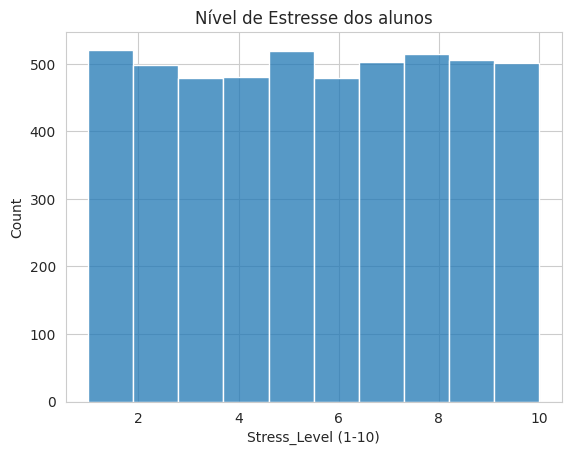

In [ ]:
# Gráfico
with sns.axes_style('whitegrid'):
  grafico = sns.histplot(data=dataset, x='Stress_Level (1-10)', bins=10)
  grafico.set(title='Nível de Estresse dos alunos')

Por mais que o nível 1 seja o que mais possui relato, os níveis de 5 a 10 são maiores do que de 1 a 5, confirmando que muitos alunos se sentiram estressados durante o período de avaliação.

## 3.13 Horas dormidas por noite

In [ ]:
# Panorama da coluna
dataset['Sleep_Hours_per_Night'].describe().T

,Sleep_Hours_per_Night
count,5000.000000
mean,6.514420
std,1.446155
min,4.000000
25%,5.300000
50%,6.500000
75%,7.800000
max,9.000000


Média de 6.5 horas dormidas por noite. Vamos ver a distribuição por nota de grade dos alunos que dormiram mais de 6 horas

In [ ]:
dormiu_6 = dataset[dataset['Sleep_Hours_per_Night'] >= 6]

nota_por_sono = dormiu_6['Grade'].value_counts().sort_index()
nota_por_sono

,count
Grade,
A,604
B,651
C,602
D,590
F,613


20% dos alunos que dormiram mais de 6 horas reprovaram.

# **4. Verificando possíveis correlação**

Após analisar as principais colunas, conseguimos levantar alguns insights valiosos:

* Há 2% mais de homens do que mulheres;
* A idade varia de 18 a 24 anos, com média de 21;
* CS é o departamento que mais tem alunos reprovados;
* Business é o que mais tem aprovados;
* Média de presença 75%, com concentração de 60 a 90% de participação;
* Média de nota de partipação é 5 e apenas 30% dos alunos tiveram uma boa participaçã (7 ou mais);
* 20% dos alunos reprovaram;
* Média de 17h de estudos por semana / 2h por dia;
* Os alunos que tiraram F possuem a mesma média de horas estudadas;
* A questão de ter internet em casa ou não ficou meio a meio;
* Filhos de familia de alta renda reprovaram mais do que rendas menores e tiraram notas em grade menores do que os outros;
* Houve mais relatos de níveis de estresse de 5 a 10 do que de 1 a 5;
* Média de 6,5h de sono;

Levantei algumas possibilidades para fazer a correlação. Peguei variáveis que eu acredito possuir algum tipo de relação:
* Média de sono dos alunos que tiraram F e são de pais de alta renda
* Atividades Extracurriculares vs nota de grade e renda familiar
* Presença vs notas de grade
* Internet em casa vs horas dormidas, presença e horas de estudo
* Nível de escolaridade dos pais vs horas estudadas por semana
* Nível de estresse vs horas estudadas vs nota final
* Horas dormidas vs nível de estresse
* Nota de participação vs acesso a internet vs notas de grade

* O cálculo da correlação retorna um número indicado o quanto os dois valores estão conectados. Analisamos o resultado da seguinte maneira:

| Valor da correlação | Interpretação                |
| ------------------- | ---------------------------- |
| **+1.00**           | Correlação positiva perfeita |
| **+0.70 a +0.99**   | Correlação positiva forte    |
| **+0.40 a +0.69**   | Correlação positiva moderada |
| **+0.10 a +0.39**   | Correlação positiva fraca    |
| **0.00**            | Sem correlação               |
| **-0.10 a -0.39**   | Correlação negativa fraca    |
| **-0.40 a -0.69**   | Correlação negativa moderada |
| **-0.70 a -0.99**   | Correlação negativa forte    |
| **-1.00**           | Correlação negativa perfeita |


## 4.1 Codificação das colunas que irei usar

Para fazer a correlação utilizando colunas com variaveis categóricas (notas em grade por exemplo) é necessário fazermos o processo de codificação, que seria transformar os valores categóricos em valores numéricos.

* Coluna do gênero

In [ ]:
dataset['Gender_num'] = dataset['Gender'].map({'Female': 0, 'Male': 1})



*   Coluna das notas em grade




In [ ]:
dataset['Grade_num'] = dataset['Grade'].map({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1})

* Coluna das atividades extracurriculares

In [ ]:
dataset['Extracurricular_Activities_num'] = dataset['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

* Coluna do acesso a internet

In [ ]:
dataset['Internet_Access_at_Home_num'] = dataset['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})

* Coluna escolaridade dos pais

In [ ]:
dataset['Parent_Education_Level_num'] = dataset['Parent_Education_Level'].map({'Unknown': 0, 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4})

* Coluna renda familiar

In [ ]:
dataset['Family_Income_Level_num'] = dataset['Family_Income_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

## 4.2 Alunos que tiraram F e renda familia alta vs horas de sono e horas estudadas

In [ ]:
# Filtrando alunos que tiraram F pela renda familiar Alta
alunos_grade_f = dataset[(dataset['Family_Income_Level'] == 'High') & (dataset['Grade'] == 'F')]
alunos_grade_f

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_num,Grade_num,Extracurricular_Activities_num,Internet_Access_at_Home_num,Parent_Education_Level_num,Family_Income_Level_num
27,Male,18,Engineering,63.85,73.21,51.01,65.02,62.87,9.71,89.32,87.53,F,15.3,No,Yes,High School,High,10,7.3,1,1,0,1,1,2
47,Female,23,Business,90.71,87.07,59.78,54.93,75.22,5.09,59.91,67.28,F,29.2,No,No,High School,High,2,6.9,0,1,0,0,1,2
59,Male,24,Business,64.05,84.60,83.31,75.07,86.65,5.67,70.92,79.61,F,19.5,No,Yes,PhD,High,3,7.0,1,1,0,1,4,2
67,Male,18,Business,62.64,86.63,65.77,84.76,74.66,3.27,96.89,98.48,F,26.7,Yes,No,Unknown,High,1,7.3,1,1,1,0,0,2
77,Male,20,Business,50.58,89.85,63.17,68.00,86.77,7.83,50.70,69.03,F,13.4,Yes,Yes,Master's,High,2,7.6,1,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,Female,23,Mathematics,75.35,57.76,47.04,79.31,82.46,9.71,81.63,84.86,F,12.0,No,Yes,Bachelor's,High,8,4.8,0,1,0,1,2,2
4872,Male,24,Business,52.93,40.35,44.66,79.93,89.78,2.27,58.68,66.11,F,11.2,No,No,Master's,High,4,7.7,1,1,0,0,3,2
4880,Female,20,Engineering,66.26,48.70,91.29,57.82,61.82,1.10,80.55,80.11,F,21.0,Yes,Yes,High School,High,2,4.0,0,1,1,1,1,2
4895,Female,20,CS,61.00,88.65,87.82,62.77,73.94,4.61,96.79,55.18,F,7.9,No,Yes,PhD,High,2,6.6,0,1,0,1,4,2


In [ ]:
# Horas dormidas dos alunos que tiraram F
alunos_grade_f['Sleep_Hours_per_Night'].describe().T

,Sleep_Hours_per_Night
count,345.000000
mean,6.689565
std,1.410243
min,4.000000
25%,5.400000
50%,6.800000
75%,7.900000
max,9.000000


In [ ]:
# Cálculo da correlação
corr_42 = alunos_grade_f[['Sleep_Hours_per_Night', 'Study_Hours_per_Week']].corr()
corr_42

,Sleep_Hours_per_Night,Study_Hours_per_Week
Sleep_Hours_per_Night,1.000000,-0.008126
Study_Hours_per_Week,-0.008126,1.000000


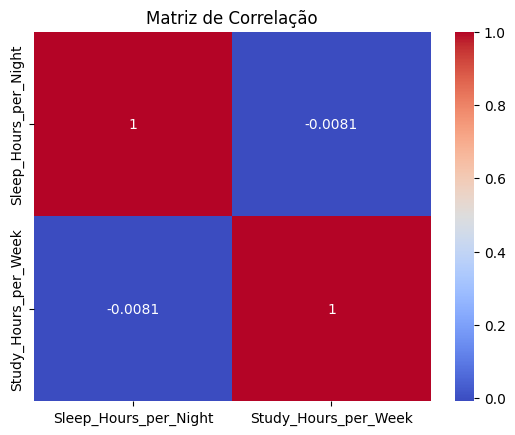

In [ ]:
sns.heatmap(corr_42, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

De acordo com a nossa tabelinha concluímos que o nível de correlação entre os alunos que tiraram F e possuem renda familia alta com horas dormidas e horas estudadas é **SEM CORRELAÇÃO.**

## 4.3 Atividades Extracurriculares vs nota de grade e renda familiar

In [ ]:
# Contando os dados
dataset['Extracurricular_Activities'].value_counts()

,count
Extracurricular_Activities,
Yes,2512
No,2488


In [ ]:
# Separando o sim e o não
atividades_sim = dataset[dataset['Extracurricular_Activities'] == 'Yes']

atividades_nao = dataset[dataset['Extracurricular_Activities'] == 'No']

In [ ]:
atividades_sim['Grade'].value_counts()

,count
Grade,
A,509
D,509
F,506
B,502
C,486


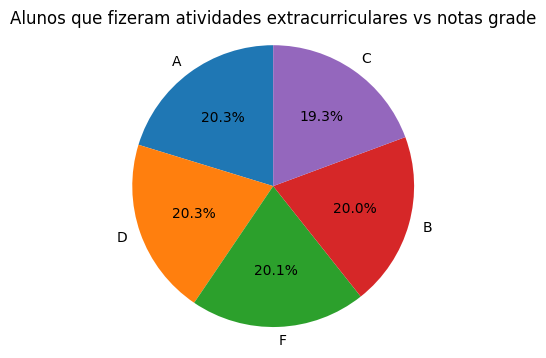

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(atividades_sim['Grade'].value_counts(), labels=atividades_sim['Grade'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Alunos que fizeram atividades extracurriculares vs notas grade')
plt.axis('equal')
plt.show()

In [ ]:
atividades_nao['Grade'].value_counts()

,count
Grade,
B,512
D,502
F,497
C,489
A,488


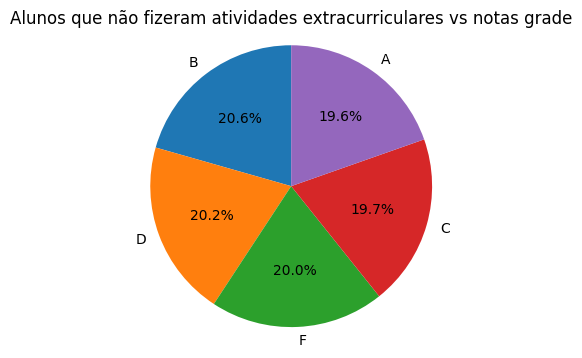

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(atividades_nao['Grade'].value_counts(), labels=atividades_nao['Grade'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Alunos que não fizeram atividades extracurriculares vs notas grade')
plt.axis('equal')
plt.show()

Praticamente a mesma porcentagem de reprovação entre os alunos que fizeram ou não atividades extracurriculares. Concluímos que não há correlação entre as duas variaveis.

Vamos ver agora a questão da renda familiar entre os alunos que fizeram atividades extracurriculares:

In [ ]:
atividades_sim['Family_Income_Level'].value_counts()

,count
Family_Income_Level,
High,863
Medium,845
Low,804


In [ ]:
atividades_nao['Family_Income_Level'].value_counts()

,count
Family_Income_Level,
Low,883
Medium,829
High,776


/tmp/ipython-input-69-4058107795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-69-4058107795.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(0, 0.5, 'Alunos')

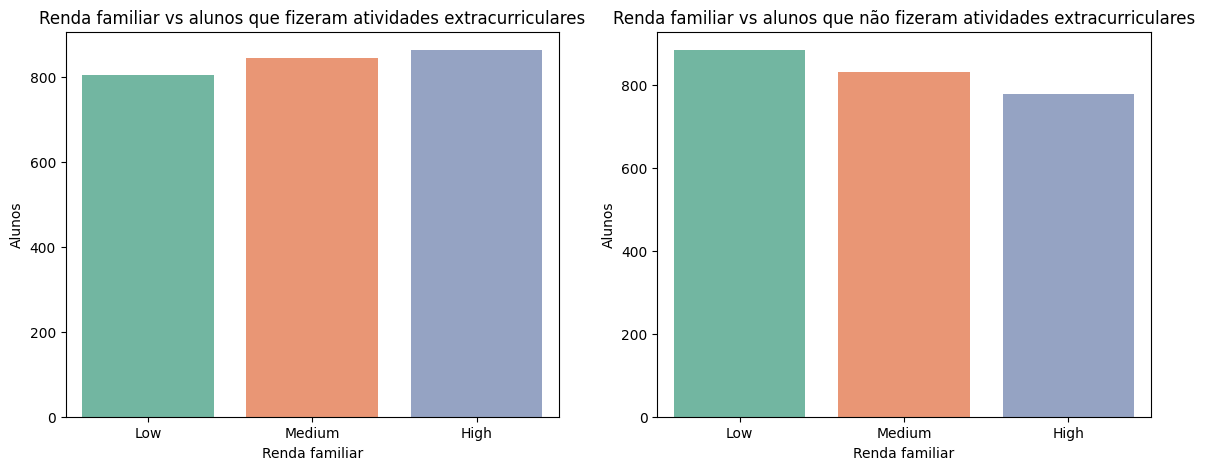

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 linha, 2 colunas

sns.countplot(
    data=atividades_sim,
    x='Family_Income_Level',
    order=['Low', 'Medium', 'High'],
    palette='Set2',
    ax=axes[0]
)

axes[0].set_title('Renda familiar vs alunos que fizeram atividades extracurriculares')
axes[0].set_xlabel('Renda familiar')
axes[0].set_ylabel('Alunos')


sns.countplot(
    data=atividades_nao,
    x='Family_Income_Level',
    order=['Low', 'Medium', 'High'],
    palette='Set2',
    ax=axes[1]
)

axes[1].set_title('Renda familiar vs alunos que não fizeram atividades extracurriculares')
axes[1].set_xlabel('Renda familiar')
axes[1].set_ylabel('Alunos')


Perceba como o gráfico é praticamente invertido entre os que fizeram e não atividades extras. Mesmo assim, a diferença é muito pequena e os dados estão bem equilibrados. Vamos confirmar a correlação:

In [ ]:
corr_43 = atividades_sim[['Grade_num', 'Family_Income_Level_num']].corr()
corr_43

,Grade_num,Family_Income_Level_num
Grade_num,1.00000,-0.00653
Family_Income_Level_num,-0.00653,1.00000


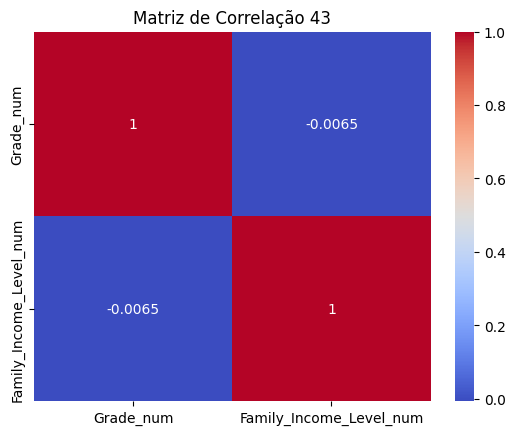

In [ ]:
sns.heatmap(corr_43, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação 43')
plt.show()

De acordo com a nossa tabelinha, o nível de correlação entre os alunos que fizeram ou não atividades extracurriculares com a nota de grade e a renda familiar é **SEM CORRELAÇÃO.**

## 4.4 Correlação de presença vs nota de grade

In [ ]:
# Calculo da correlação
corr_44 = dataset[['Attendance (%)', 'Grade_num']].corr()
corr_44

,Attendance (%),Grade_num
Attendance (%),1.000000,0.024828
Grade_num,0.024828,1.000000


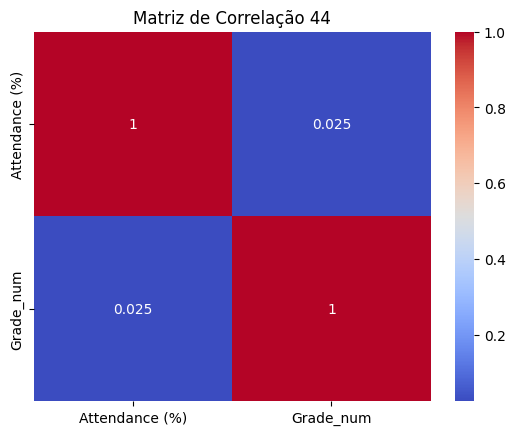

In [ ]:
sns.heatmap(corr_44, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação 44')
plt.show()

De acordo com a nossa tabelinha, o nível de correlaçãio entre a porcentafgem de presença dos alunos com a nota de grade é **SEM CORRELAÇÃO.**

## 4.5 Internet em casa vs horas dormidas, presença e horas de estudo

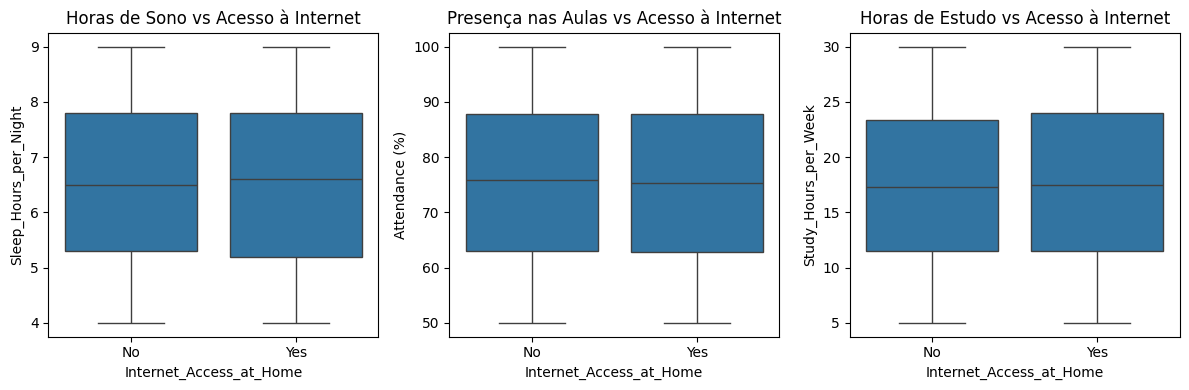

In [ ]:
plt.figure(figsize=(12, 4))

# Horas de sono
plt.subplot(1, 3, 1)
sns.boxplot(data=dataset, x='Internet_Access_at_Home', y='Sleep_Hours_per_Night')
plt.title('Horas de Sono vs Acesso à Internet')

# Percentual de presença
plt.subplot(1, 3, 2)
sns.boxplot(data=dataset, x='Internet_Access_at_Home', y='Attendance (%)')
plt.title('Presença nas Aulas vs Acesso à Internet')

# Horas de estudo
plt.subplot(1, 3, 3)
sns.boxplot(data=dataset, x='Internet_Access_at_Home', y='Study_Hours_per_Week')
plt.title('Horas de Estudo vs Acesso à Internet')

plt.tight_layout()
plt.show()


**Os gráficos acima comprovam que o fato do aluno ter ou não internet em casa não influenciou nas horas de sono, na presença das aulas e nas horas de estudos.**

## 4.6 Nível escolaridade dos pais vs horas estudadas por semana

Text(0.5, 1.0, 'Nível de escolaridade dos pais vs horas estudadas por semana')

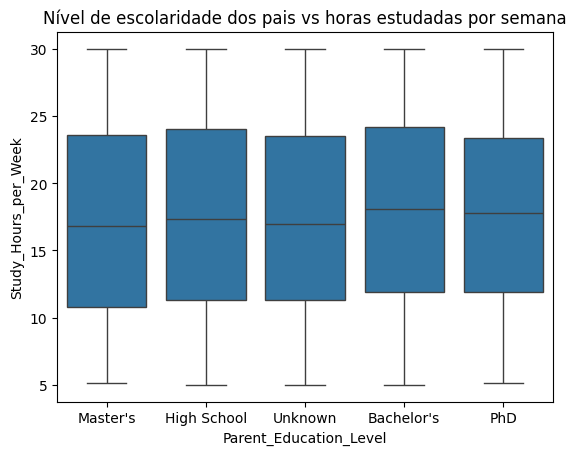

In [ ]:
sns.boxplot(data=dataset, x='Parent_Education_Level', y='Study_Hours_per_Week')
plt.title('Nível de escolaridade dos pais vs horas estudadas por semana')

Há sim uma pequena vantagem para os alunos que o pai possui nível Bacharel e no caso do nível Mestrado, talvez tenha um pouco mais de "relaxo" das horas estudadas. Ainda assim, a diferença é bem pequena. Vamos ver se o cálculo de correlação acusa alguma coisa.

In [ ]:
corr_46 = dataset[['Parent_Education_Level_num', 'Study_Hours_per_Week']].corr()
corr_46

,Parent_Education_Level_num,Study_Hours_per_Week
Parent_Education_Level_num,1.000000,0.010197
Study_Hours_per_Week,0.010197,1.000000


De acordo com a nsosa tabelinha, o nível de correlação entre o nível educacional dos pais e as horas estudadas por semana é **SEM CORRELAÇÃO.**

## 4.7 Correlaçao nível de estresse vs horas estudadas vs nota final

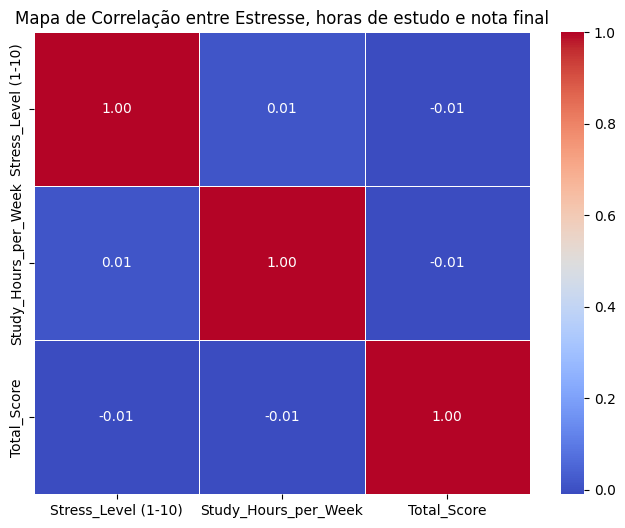

In [ ]:
corr_47 = dataset[['Stress_Level (1-10)', 'Study_Hours_per_Week', 'Total_Score']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_47, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação entre Estresse, horas de estudo e nota final')
plt.show()

Analisando o gráfico e de acordo com a nossa tabelinha, o nível de correlação entre as variáveis: nível de estree, nota final e horas estudadas por semana é **SEM CORRELAÇÃO.**

## 4.8 Horas de dormidas vs nível de estresse

/tmp/ipython-input-78-3000983499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


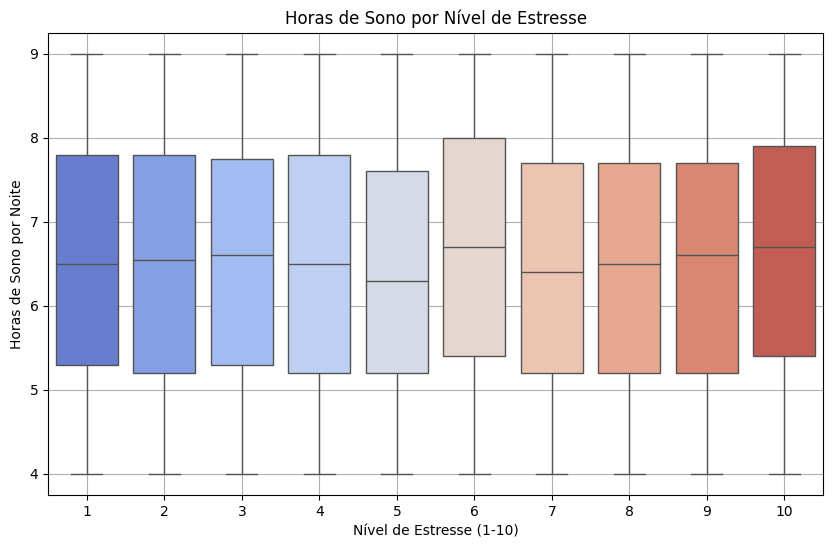

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Stress_Level (1-10)',
    y='Sleep_Hours_per_Night',
    data=dataset,
    palette='coolwarm'
)
plt.title('Horas de Sono por Nível de Estresse')
plt.xlabel('Nível de Estresse (1-10)')
plt.ylabel('Horas de Sono por Noite')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
corr_48 = dataset[['Sleep_Hours_per_Night', 'Stress_Level (1-10)']].corr()
corr_48

,Sleep_Hours_per_Night,Stress_Level (1-10)
Sleep_Hours_per_Night,1.000000,0.016442
Stress_Level (1-10),0.016442,1.000000


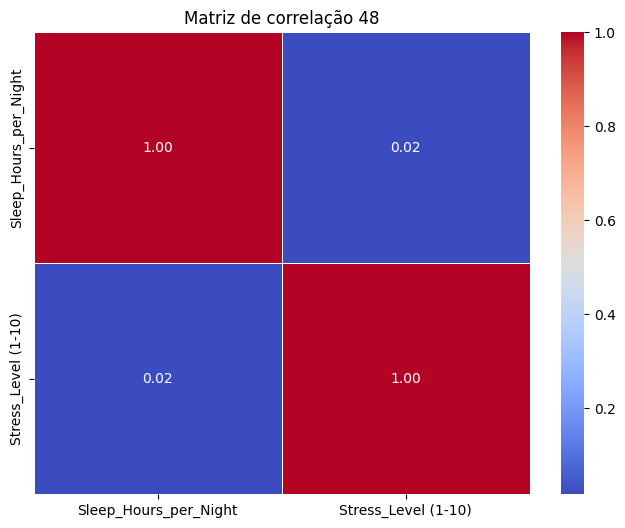

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_48, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlação 48')
plt.show()

De acordo com a nossa tabelinha, o nível de correlação entre horas dormidas e nível de estresse é **SEM CORRELAÇÃO.**

## 4.9 Nota de participação vs acesso a internet vs notas de grade

In [ ]:
corr_49 = dataset[['Participation_Score', 'Grade_num', 'Internet_Access_at_Home_num']].corr()
corr_49

,Participation_Score,Grade_num,Internet_Access_at_Home_num
Participation_Score,1.000000,0.008329,-0.010964
Grade_num,0.008329,1.000000,-0.005781
Internet_Access_at_Home_num,-0.010964,-0.005781,1.000000


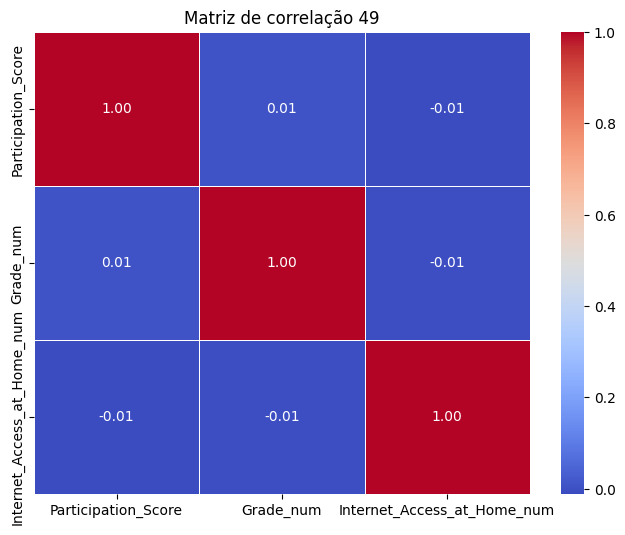

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_49, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlação 49')
plt.show()

De acordo com a nossa tabelinha, o nível de correlação entre a nota de participação, o aluno ter ou não internet em casa e as notas de grade é **SEM CORRELAÇÃO.**

# **5. Testando modelo de aprendizado de máquina**

Para finalizar este projeto eu quero testar uma hipótese que me veio a cabeça: as horas de estudos e horas dormidas influenciam na nota do aluno?

Obviamente qualquer pessoa concordaria que sim, mas de acordo com o dataset, as variaveis se prostaram pouco efetiva na influencia da nota final do aluno. Então para finlaizar, eu quero comprovar isso através de um **modelo de regressão linear.** Vou fazer também com outras variaveis.

## 5.1 Preparação

A codificação das variavéis ja estão feitas como visto no item 4, portanto só irei aproveitá-las.

In [ ]:
# Nosso dataset com as colunas codificadas.
dataset

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_num,Grade_num,Extracurricular_Activities_num,Internet_Access_at_Home_num,Parent_Education_Level_num,Family_Income_Level_num
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9,0,3,1,0,3,1
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3,1,1,0,0,1,0
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1,1,1,1,0,1,0
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9,0,5,0,1,1,0
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5,0,5,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,A,7.8,No,No,Master's,Medium,10,4.5,1,5,0,0,3,1
4996,Male,19,Mathematics,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,C,24.2,No,Yes,Unknown,Medium,4,7.2,1,3,0,1,0,1
4997,Female,24,CS,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,D,7.6,No,Yes,Unknown,High,5,6.6,0,2,0,1,0,2
4998,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,A,14.5,Yes,No,PhD,Medium,10,5.9,1,5,1,0,4,1


In [ ]:
# Iniciamos um modelo vazio, vamos colocar nossos dados nele para ir treinar o modelo
model = LinearRegression()

## 5.2 Conseguimos prever a nota do aluno dado a quantidade de horas dormidas e horas estudadas?


### 5.2.1 Criando o modelo 1

In [ ]:
# Crio um novo dataframe com as colunas que irei avaliar
dataset_modelo = ['Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Grade_num']
df_modelo_1 = dataset[dataset_modelo]

Nesta etapa faço a separação do dataset: uma parte para o treino e a outra para o teste. Decidi separar 25% para o teste de por ser uma divisão recomendada pelo tamanho do dataset.

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    df_modelo_1.drop(['Grade_num'], axis=1),
    df_modelo_1['Grade_num'],
    test_size=0.25,
    random_state=123
)

In [ ]:
# Prova que temos 75% dos dados para treino
predictors_train.shape

(3750, 2)

In [ ]:
# Prova que temos 75% dos dados para teste
predictors_test.shape

(1250, 2)

### 5.3.2 Treino modelo 1

In [ ]:
# Treino do modelo
model_v1 = model.fit(predictors_train, target_train)

In [ ]:
# Exibindo o resultado
model_v1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Study_Hours_per_Week', 'Sleep_Hours_per_Night'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.00531382, 0.00572456]),
 'rank_': 2,
 'singular_': array([440.18568493,  88.250351  ]),
 'intercept_': np.float64(2.870947265800127)}

Perceba os valores da linha 'coef_'. Esses valores indicam o quanto cada variavel pode aumentar a nota do aluno. Por exemplo:
* Study_Hours_per_Week: cada hora estudada por semana aumenta em 0.005 a nota do aluno;
* Sleep_Hours_per_Night: cada hora de sono diária aumenta e 0.005 a nota do aluno;

Ou seja: o modelo de regressão linear confirma que as duas variáveis tem pouca influência na nota do aluno. Vamos continuar:

* Preparando o cálculo do erro quadrático médio

In [ ]:
target_predicted = model.predict(predictors_test)

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

1.3858891119953956


Um erro quadrático médio de 1.38 indica que a nota prevista pelo modelo apresenta uma variação de cerca de + ou - 1.38 pontos em relação a nota real dos alunos.

Vamos dar uma olhada no desvio padrão das notas:

In [ ]:
df_modelo_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_per_Week,5000.0,17.52114,7.193035,5.0,11.5,17.4,23.7,30.0
Sleep_Hours_per_Night,5000.0,6.51442,1.446155,4.0,5.3,6.5,7.8,9.0
Grade_num,5000.0,2.99820,1.416121,1.0,2.0,3.0,4.0,5.0


Com um desvio padrão de 1.41 e um erro quadrático médio de 1.38 o desempenho do modelo é similar ao de uma previsão baseada apenas na média, o que reforça a questão dos dados estarem muito bem equilibrados como visto nas análises do item 3 e 4.

Vamos fazer uma previsão, criando valores para horas estudadas e as horas dormidas:

In [ ]:
# Aluno estudou 10 horas por semana e dormiu 9 horas por dia
novo_aluno = pd.DataFrame({
    'Study_Hours_per_Week': [10],
    'Sleep_Hours_per_Night': [9]
})

nota_prevista = model_v1.predict(novo_aluno)
print(nota_prevista)

# Nota de D a C



[2.9756065]


Nesta configuração o modelo previu que o aluno tiraria uma nota entre D e C, conforme a tabela de codificação visto no item 4.1:

* A: 5
* B: 4
* C: 3
* D: 2
* F: 1

In [ ]:
# Aluno estudou 35 horas por semana e dormiu 9 horas por dia
novo_aluno = pd.DataFrame({
    'Study_Hours_per_Week': [35],
    'Sleep_Hours_per_Night': [9]
})

nota_prevista = model_v1.predict(novo_aluno)
print(nota_prevista)

[3.10845206]


Entre os dois exemplos temos uma diferença de +25 horas estudadas e o resultado final foi 3.11. Ou seja, o aluno estudando mais 25 horas na semana aumenta apenas 0.14 de nota, ainda continuando na nota C. Isso reitera a hipótese de que os dados tem pouca influencia na nota final do aluno.

## 5.3 Prever a nota final do aluno com mais variáveis

Agora vou criar um segundo modelo com outras variaveis já codificadas para verificarmos se existe influencia na nota final do aluno.

In [ ]:
model_v2 = LinearRegression()

# Crio um novo dataframe com as colunas que irei usar
dataset_modelo_2 = ['Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Attendance (%)', 'Gender_num', 'Grade_num', 'Extracurricular_Activities_num', 'Parent_Education_Level_num']
df_modelo_2 = dataset[dataset_modelo_2]

# Faço a separação para treino e teste
predictors_train_v2, predictors_test_v2, target_train_v2, target_test_v2 = train_test_split(
    df_modelo_2.drop(['Grade_num'], axis=1), #deixo a variável resposta de fora
    df_modelo_2['Grade_num'], # passo a variável resposta
    test_size=0.25, # irei separar 25% para teste e 75% para criação do modelo
    random_state=123
)

# Crio o modelo
model_v2.fit(predictors_train_v2, target_train_v2)

model_v2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Attendance (%)',
        'Gender_num', 'Extracurricular_Activities_num',
        'Parent_Education_Level_num'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ 0.00523119,  0.00524558,  0.00255194,  0.01522948,  0.01484558,
        -0.00529594]),
 'rank_': 6,
 'singular_': array([878.80866011, 440.09839491,  88.77819119,  86.91631183,
         31.09349403,  30.0982277 ]),
 'intercept_': np.float64(2.678941097486494)}

Perceba os coeficientes positivos, com exceção do 'Extracurricular_Activities' que é negativo. A influencia é baixa, mas no geral ela é positiva.

In [ ]:
# Cálculo do erro quadrático médio
target_predicted_v2 = model_v2.predict(predictors_test_v2)

rmse_v2 = np.sqrt(mean_squared_error(target_test_v2, target_predicted_v2))
print(rmse_v2)

1.3855860590446416


No **modelo 1** com apenas 2 variáveis o erro quadrático médio foi de **1.385889**. No **modelo 2** com 6 variáveis o erro quadrático foi de **1.385586**, ou seja praticamente a mesma coisa.

Para prever a nota do aluno não está muito diferente do que ir pela média. Ambos os modelos reforçam a tese de que os dados tem pouca influencia entre si, neste caso na nota final.

# **6. Conclusão**

Com base na análise exploratória realizada, concluo que em média 20% dos alunos foram reprovados e 80% aprovados. Fatores pessoais como comportamento dos alunos, nível de renda familiar e nível de dedicação não os influenciaram a **tirar notas específicas**, mas sim tiveram algum tipo de peso na reprovação de mais de **1000 alunos.**

Como vimos durante o projeto, os dados estão muito bem distribuídos, sem desequilíbrios relevantes entre as classes ou categorias avaliadas. A cada divisão que você faz para uma análise mais profunda, encontramos dados bem equilibrados e com diferenças mínimas entre eles.

O modelo de regressão linear foi capaz de identificar que as variáveis dispostas (sono, estudo, frequência...) tem influência positiva na nota do aluno, mas com impacto individual pequeno. Do mesmo modo a análise de correlação indicou que as variáveis numéricas não possuem relações lineares fortes entre si.


Agradeço você que leu até aqui, Deus te abençoe!